In [1]:
#Locate the data, prepare for import of the MPT file
#Import necessary packaging
from utils.tools import *
from os import listdir
from os.path import isfile, join
from utils.tools import *
import statistics as stat
path=r"C:\Users\cjang\Desktop\Kyler_Speed_Circuit\data\\"
path_files = [f for f in listdir(path) if isfile(join(path, f)) if f[-3:] == 'mpt']
path_files

['DE_40_10_60.mpt',
 'DE_40_11_60.mpt',
 'DE_40_12_60.mpt',
 'DE_40_13_60.mpt',
 'DE_40_14_60.mpt',
 'DE_40_15_60.mpt',
 'DE_40_1_30.mpt',
 'DE_40_2_60.mpt',
 'DE_40_3_60.mpt',
 'DE_40_4_60.mpt',
 'DE_40_5_60.mpt',
 'DE_40_6_60.mpt',
 'DE_40_7_60.mpt',
 'DE_40_8_60.mpt',
 'DE_40_9_60.mpt',
 'DE_49_1_30.mpt',
 'DE_49_2_30.mpt',
 'DE_49_3_30.mpt',
 'DE_49_4_30.mpt',
 'DE_49_5_30.mpt',
 'DE_49_6_30.mpt',
 'DE_49_7_30.mpt',
 'DE_49_8_30.mpt',
 'DE_49_9_30.mpt',
 'DE_57_6_60.mpt']

No handles with labels found to put in legend.


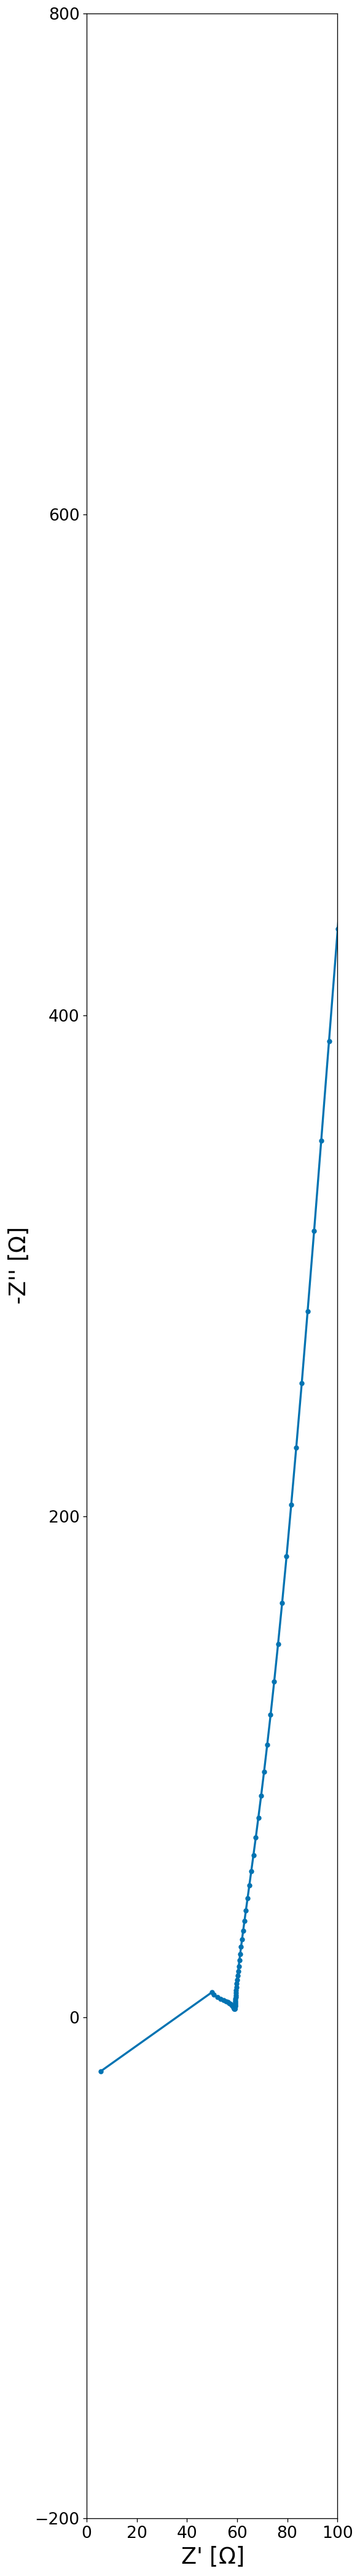

In [2]:
ex_mpt = mpt_data(path,['DE_40_7_60.mpt'])
ex_mpt.set_new_gph_dims(20,100)
ex_mpt.mpt_plot(x_window = [0, 100], y_window = [-200,800])

In [6]:
ex_mpt.fast_mask(), ex_mpt.masker(), ex_mpt.masker0()

([1000018.6, 1778.2927], [891246.69, 281.89429], [1000018.6, 141.31134])

In [54]:
masked_mpt = mpt_data(path, ['DE_40_7_60.mpt'], mask =[891246.69, 1.72])

No handles with labels found to put in legend.


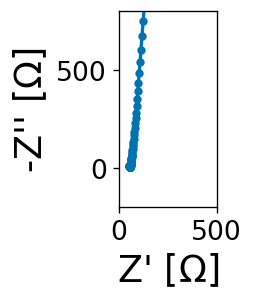

In [55]:
masked_mpt.mpt_plot(x_window = [0, 500], y_window = [-200,800])